In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [24]:
original_path = r"D:\UAV_DATA_NEW\output\2_polygonize\061301_result_opened_polygonized.shp"
obb_path = r"D:\UAV_DATA_NEW\output\3_obb\061301_result_opened_polygonized_obb.shp"

original_file = gpd.GeoSeries.from_file(original_path).set_crs(epsg=4326).to_crs(epsg=3857)
obb_file = gpd.GeoSeries.from_file(obb_path).set_crs(epsg=4326).to_crs(epsg=3857)

In [51]:
indices = []
all_widths = []
for index, polygon in enumerate(obb_file):
    coordsx, coordsy = polygon.exterior.coords.xy
    edge1 = (coordsx[0] - coordsx[1])**2 + (coordsy[0] - coordsy[1])**2
    edge2 = (coordsx[1] - coordsx[2])**2 + (coordsy[1] - coordsy[2])**2

    minedge = min(edge1, edge2)
    all_widths.append(sqrt(minedge))

    if minedge > 1.2**2:
        indices.append(index)

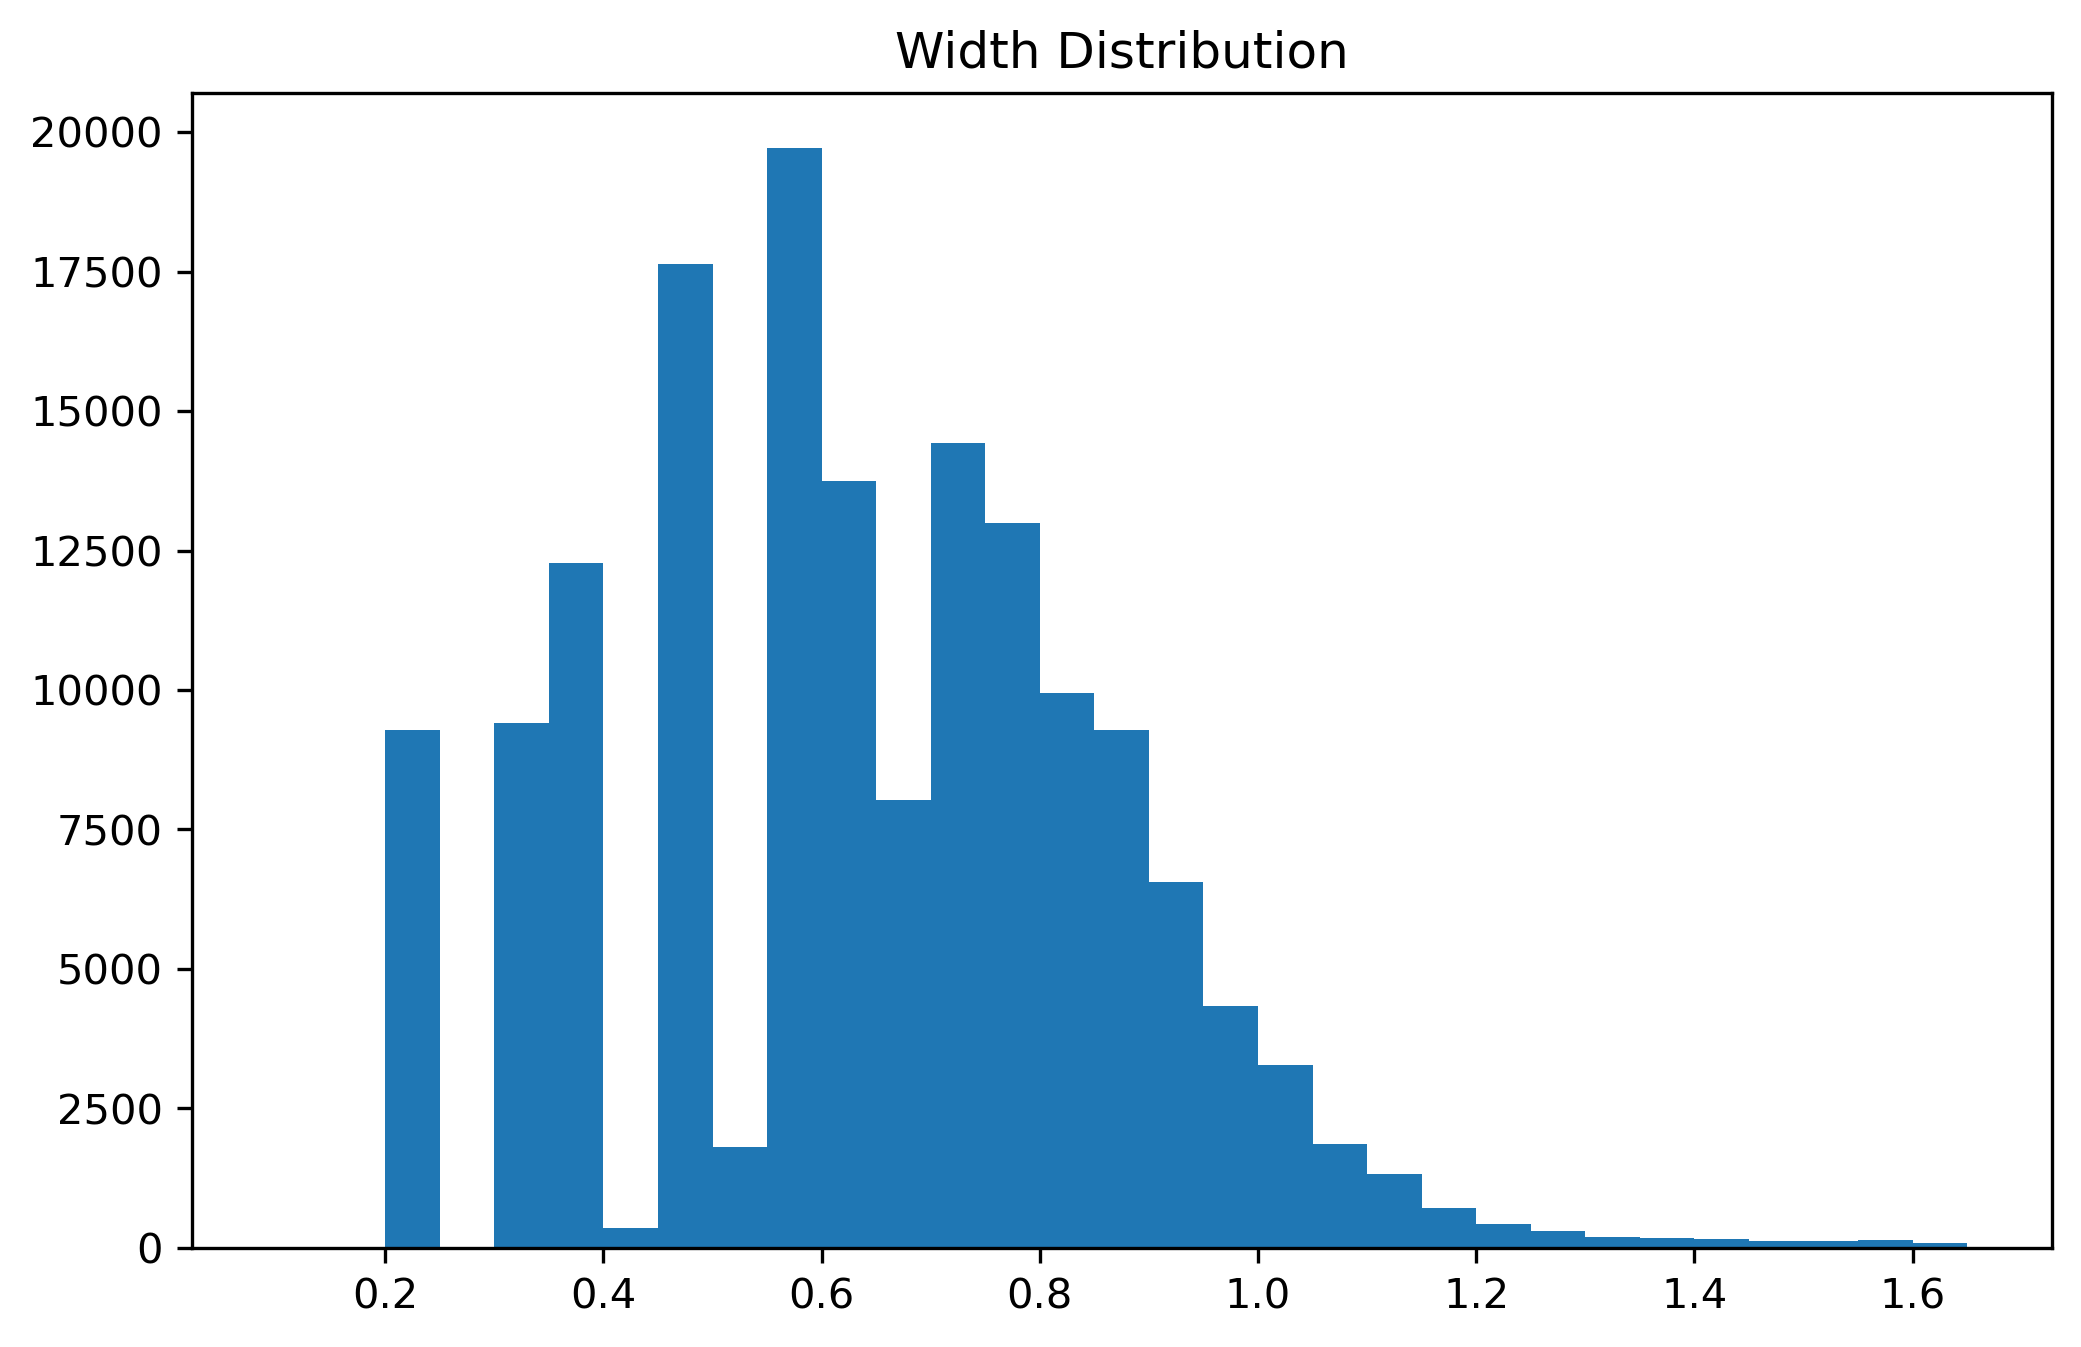

In [57]:
plt.figure(figsize=(8, 5),dpi=300)
plt.title('Width Distribution')
plt.hist(all_widths, np.arange(0.1, 1.7, 0.05))
plt.show()

In [53]:
indices = np.array(indices)
print(len(indices),indices)

2344 [   106    122    126 ... 159284 159291 159292]


In [55]:
original_file.loc[indices].to_crs(epsg=4326).to_file(
    r"D:\UAV_DATA_NEW\output\area\polygonize_morph_P061301_result_width_filtered.shp", )
obb_file.loc[indices].to_crs(
    epsg=4326).to_file(r"D:\UAV_DATA_NEW\output\area\polygonize_morph_P061301_result_width_filtered_obb.shp")
